# CS 6220 Data Mining — Assignment 6 — Regression

In [1]:
# load the required python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# load the dataset from sklearn
X, y = load_boston(return_X_y=True)

In [3]:
# Step 1 Split the dataset into training and test sets (80, 20).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# Step 2(a) Use all the features (1-13) to fit the linear regression model for feature 14 using the training set.
reg = LinearRegression().fit(X_train, y_train)

In [5]:
# Step 2(b) Report the coefficients, mean squared error and variance score for the model on the test set
# The coefficient
y_pred = reg.predict(X_test)
print(f'Coefficients: {reg.coef_}')
# The mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}')
# Explained variance score : 1 is perfect prediction
print(f'Variance score: {reg.score(X_test , y_test):.2f}')


Coefficients: [-9.80830770e-02  5.66681041e-02  1.01774298e-02  2.34815202e+00
 -1.61908388e+01  3.28626021e+00  5.23584674e-04 -1.54910162e+00
  2.89668904e-01 -1.27943768e-02 -8.87465064e-01  1.01398371e-02
 -5.21650834e-01]
Mean squared error: 35.77
Variance score: 0.70


In [6]:
# These are the feaures based on the description of the data http://lib.stat.cmu.edu/datasets/boston
features = [ 'per capita crime rate by town',
'proportion of residential land zoned for lots over 25,000 sq.ft.',
'proportion of non-retail business acres per town',
'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
'nitric oxides concentration (parts per 10 million)',
'average number of rooms per dwelling',
'proportion of owner-occupied units built prior to 1940',
'weighted distances to five Boston employment centres',
'index of accessibility to radial highways',
'full-value property-tax rate per $10,000',
'pupil-teacher ratio by town',
'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
'% lower status of the population',
"Median value of owner-occupied homes in $1000's"
]


Regression models trained on each feaure, black points are training data, red points are test data, and the best fit line is blue.


Feature 1: Per Capita Crime Rate By Town
Coefficient: -0.3958381860042043
Mean squared error: 105.77
Variance score: 0.11



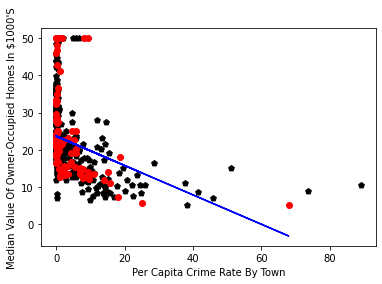

Feature 2: Proportion Of Residential Land Zoned For Lots Over 25,000 Sq.Ft.
Coefficient: 0.1461164338402002
Mean squared error: 113.66
Variance score: 0.04



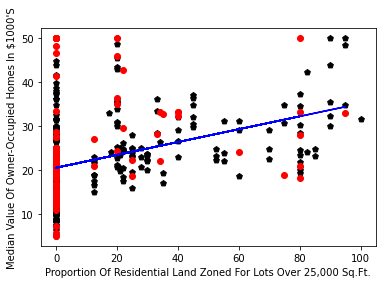

Feature 3: Proportion Of Non-Retail Business Acres Per Town
Coefficient: -0.6341591903976336
Mean squared error: 100.02
Variance score: 0.16



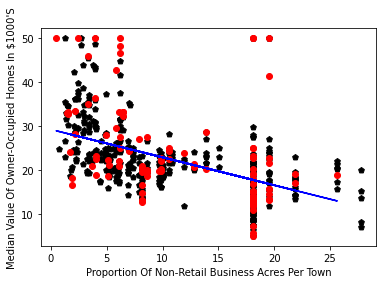

Feature 4: Charles River Dummy Variable (= 1 If Tract Bounds River; 0 Otherwise)
Coefficient: 5.60909090909091
Mean squared error: 114.90
Variance score: 0.03



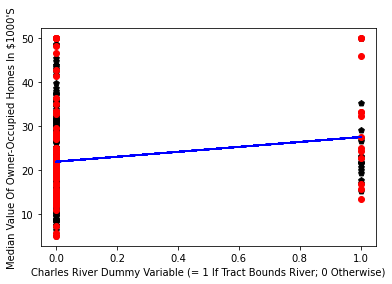

Feature 5: Nitric Oxides Concentration (Parts Per 10 Million)
Coefficient: -34.269117270934764
Mean squared error: 104.32
Variance score: 0.12



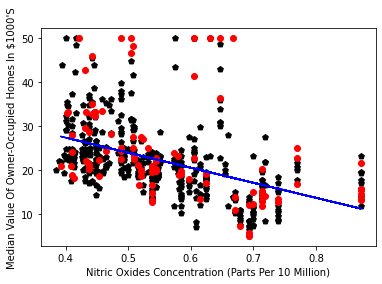

Feature 6: Average Number Of Rooms Per Dwelling
Coefficient: 8.510226330992687
Mean squared error: 56.46
Variance score: 0.52



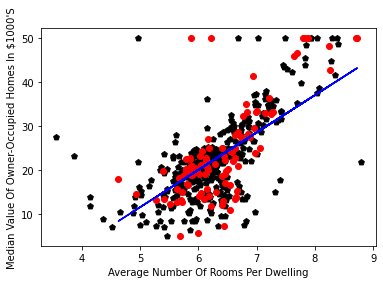

Feature 7: Proportion Of Owner-Occupied Units Built Prior To 1940
Coefficient: -0.1160028916357086
Mean squared error: 105.28
Variance score: 0.11



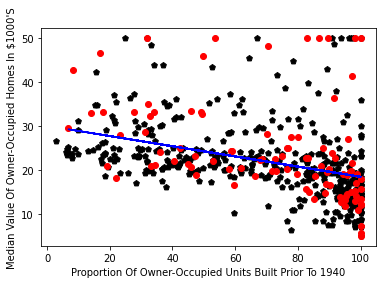

Feature 8: Weighted Distances To Five Boston Employment Centres
Coefficient: 1.1232858153699654
Mean squared error: 117.19
Variance score: 0.01



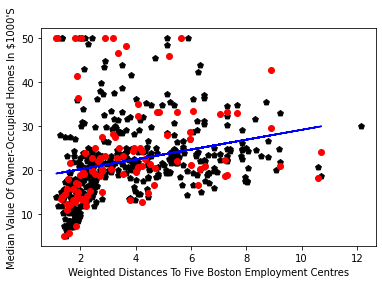

Feature 9: Index Of Accessibility To Radial Highways
Coefficient: -0.4078395376387012
Mean squared error: 110.23
Variance score: 0.07



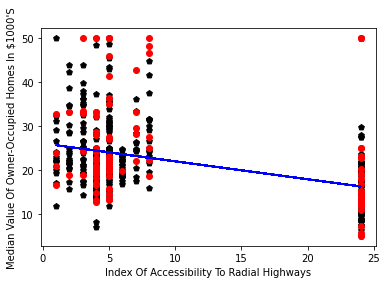

Feature 10: Full-Value Property-Tax Rate Per $10,000
Coefficient: -0.025024114416949465
Mean squared error: 100.95
Variance score: 0.15



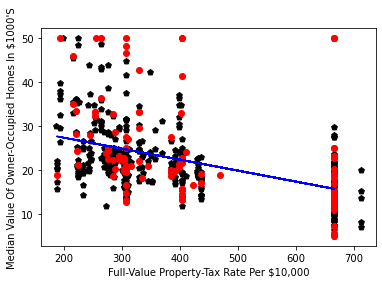

Feature 11: Pupil-Teacher Ratio By Town
Coefficient: -2.1712216988675066
Mean squared error: 97.82
Variance score: 0.18



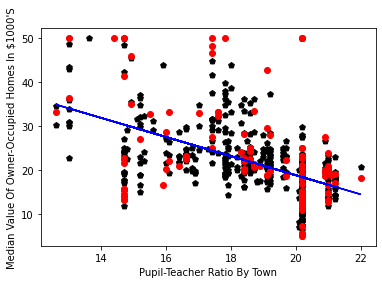

Feature 12: 1000(Bk - 0.63)^2 Where Bk Is The Proportion Of Blacks By Town
Coefficient: 0.033103894779787806
Mean squared error: 111.01
Variance score: 0.07



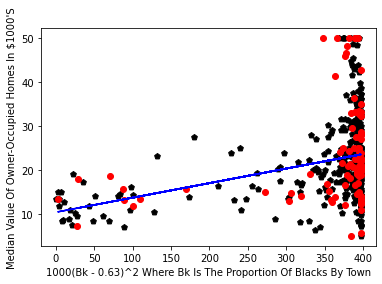

Feature 13: % Lower Status Of The Population
Coefficient: -0.9031451570139893
Mean squared error: 59.18
Variance score: 0.50



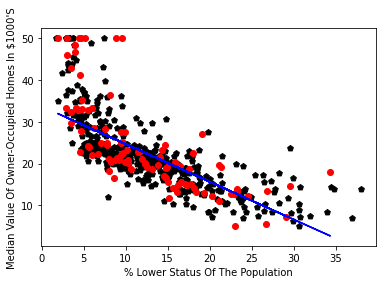

In [7]:
"""
Step 3(a) Use each feature alone - to fit a linear regression model on the training set.
Step 3(b) Report the coefficient, mean squared error and variance score for the model on the test set. 
Also report the thirteen plots of the linear regression models generated on each feature. 
Each plot should distinctly show the training points, test points and the linear regression line.
"""
print('Regression models trained on each feaure, black points are training data, red points are test data, and the best fit line is blue.\n\n')

for i in range(13):
    print(f'Feature {i+1}: {features[i].title()}')
    reg_ = LinearRegression().fit(X_train.T[i].reshape(-1, 1), y_train)
    fy_pred = reg_.predict(X_test.T[i].reshape(-1, 1))
    print(f'Coefficient: {reg_.coef_[0]}')
    print(f'Mean squared error: {mean_squared_error(y_test, fy_pred):.2f}')
    print(f'Variance score: {reg_.score(X_test.T[i].reshape(-1, 1) , y_test):.2f}\n')
    plt.scatter(X_train.T[i].reshape(-1, 1), y_train, color='black', marker='p')
    plt.scatter(X_test.T[i].reshape(-1, 1), y_test, color='red')
    plt.plot(X_test.T[i].reshape(-1, 1), fy_pred, color='blue')
    plt.xlabel(features[i].title())
    plt.ylabel(features[13].title())
    plt.show()


Text(0, 0.5, 'Average Variance (Higher is Better)')

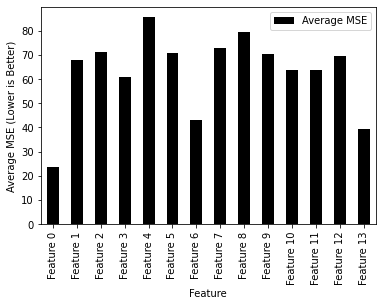

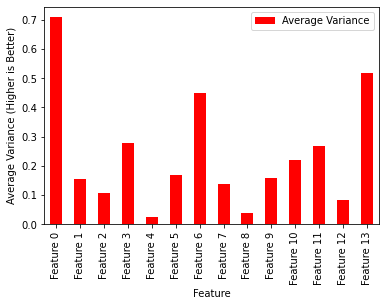

In [8]:
"""
Step 4(a) Perform 10 iterations of (Step 1, Step 2(a), and Step 3(a)).

Step 4(b)

    •During each iteration of Step4(a), gather the metrics - mean squared error and variance
    score for the 14 models on the test set.

    •For each feature, compute the average, over the 10 iterations, of each evaluation metric.
    Do the same for the metrics corresponding to ’all features’.

    •To compare the model performance, provide the following plots
        1. mean square error vs features
        2. variance score vs features

    •In the above mentioned two plots, make sure to designate a point on the features axis
    for ’all 13 features’ so you can include the metrics corresponding to the models gener-
    ated in the 10 iterations of Step 2(a). E.g., You may designate it as feature 0.
"""

df = pd.DataFrame(columns=['Feature', 'Average MSE', 'Average Variance'])

# Feature 0
vals_1 = []
vals_2 = []
for i in range(10):
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2)
    reg_ = LinearRegression().fit(X_train_, y_train_)
    pred = reg_.predict(X_test_)
    vals_1.append(mean_squared_error(y_test_, pred))
    vals_2.append(reg_.score(X_test_, y_test_))

df = df.append({'Feature': 'Feature 0', 'Average MSE': np.mean(vals_1), 'Average Variance': np.mean(vals_2)}, ignore_index=True)


# Rest of features
for i in range(13):
    val_i = []
    val_ii = []
    for _ in range(10):
        X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2)
        reg_ = LinearRegression().fit(X_train_.T[i].reshape(-1, 1), y_train_)
        pred = reg_.predict(X_test_.T[i].reshape(-1, 1))
        val_i.append(mean_squared_error(y_test_, pred))
        val_ii.append(reg_.score(X_test_.T[i].reshape(-1, 1), y_test_))
    df = df.append({'Feature': f'Feature {i+1}', 'Average MSE': np.mean(val_i), 'Average Variance': np.mean(val_ii)}, ignore_index=True)

df.plot.bar(x='Feature', y='Average MSE', color='black')
plt.ylabel('Average MSE (Lower is Better)')
df.plot.bar(x='Feature', y='Average Variance', color='red')
plt.ylabel('Average Variance (Higher is Better)')


1. Based upon the linear models you generated, which feature appears to be most
predictive for the target feature? Note that you can answer this question based
upon the output provided for the linear models.

The feature which seems to be the most predictive was Feature 13: % Lower Status Of The Population. This feature had the highest average variance, a variance of 1 would be a perfect prediction and the lowest MSE where a 0 would be a perfect prediction. This is easy to see when looking at the plots generated from part 4 which shows the average variance and the average MSE for the features.

2. Suppose you need to select two features for a linear regression model to predict the target feature. Which two features would you select? Why?

I would select feature 13 and feature 6 which are '% Lower Status Of The Population' and 'Average Number Of Rooms Per Dwelling' respectively. As described above feature 13 seems to be the most predicted feature. Following the same logic feature 6 is the second most predictive feature. It would make sense to select these two features as the two features to use for a linear regression model to create the best model based off only 2 features. Selecting these two features would end up having the lowest average MSE and the highest average variance for any model which only used two features from the data set.

3. Examine all the plots and numbers you have, do you have any comments on them?
Do you find any surprising trends? Do you have any idea about what might be
causing this surprising trend in the data? This is a descriptive question meant to
encourage you to interpret your results and express yourself.

When exploring the dataset there was some interesting explorations into Feature 12. The first thing that clued me into looking into this piece of data was the deprication warning on scikitlearn's site. [1](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html?highlight=boston#sklearn.datasets.load_boston). The resources on the scikitlearn site talk about ethical issues which are involved in this dataset. I spent some time exploring the reasons behind this ethical issue and found it very interesting how there was baked in assumption with this data. 


The scikitlearn website states: 
"The Boston housing prices dataset has an ethical problem: as investigated in [[1]](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8), the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices [[2]](https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air). Furthermore the goal of the research that led to the creation of this dataset was to study the impact of air quality but it did not give adequate demonstration of the validity of this assumption." 

I found the fact that there was 8 fetures which had negative coefficients was interesting, a majority of features in this dataset seemed to have a negative relationship with the predcited feature. Most features seemed to have little ability to predict the median value of owner-occupied homes by themselves, I wonder if there is any relationship between the fact that most features had a negative relationship and this that there was little predictability from the single feature models. Furthermore the one binary discrete categorical feature seemed to have a horrible time with predicting our output.

1: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html?highlight=boston#sklearn.datasets.load_boston

\[1\]: https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

\[2\]: https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air